In [1]:
import torch
import torchvision

In [2]:
n_epochs = 50
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [7]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [8]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [9]:
#example_data = example_data.reshape(example_data.shape[0], 784)
example_data.shape

torch.Size([1000, 1, 28, 28])

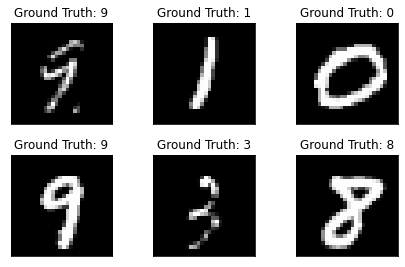

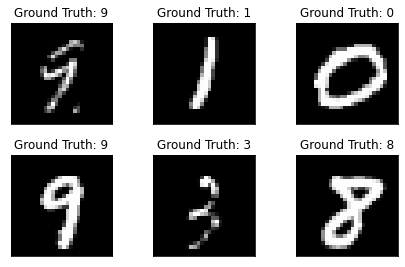

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [11]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [12]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(784, 100)
        self.linear2 = torch.nn.Linear(100, 10)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        return F.log_softmax(x)

In [13]:
network = Net()
network.cuda()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

In [14]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [15]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.reshape(data.shape[0], 784)
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), 'E:/GitHub Repos/TheEarlyBird/Aufgabe1/Nico/results/model.pth')
            torch.save(optimizer.state_dict(), 'E:/GitHub Repos/TheEarlyBird/Aufgabe1/Nico/results/optimizer.pth')

In [16]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.reshape(data.shape[0], 784)
            data = data.cuda()
            target = target.cuda()
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

In [23]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

RuntimeError: mat1 dim 1 must match mat2 dim 0

ValueError: x and y must be the same size

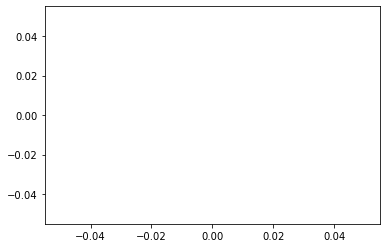

In [61]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [17]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(784, 100)
        self.linear2 = torch.nn.Linear(100, 10)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        return F.log_softmax(x)

In [18]:
n_epochs = 50
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

In [19]:
network = TwoLayerNet()
network.cuda()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [20]:
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

<ipython-input-17-7ffefe920e8c>:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
E:\ProgramData\Anaconda3\lib\site-packages\torch\nn\_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.2988, Accuracy: 1202/10000 (12%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.312334
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.180333
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.925839
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.751650
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.821983
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.583419
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.291271
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.366841
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.243234
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.067658
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.922802
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.923849
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.788014
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.868940
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.982674
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.844377
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.714670
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.910900
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.615197
Train Epoch: 1 [12160